In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Importing Libraries
**Pandas**: Use for data manipulation and data analysis. <br>
**Numpy**: a fundamental package for scientific computing with Python. <br>
**Matplotlib** & **Seaborn**: for visualisation. <br>
**Scikit-learn**: for data preprocessing techniques and ML algorithms. <br>

In [ ]:
# main libraries
import pandas as pd
import numpy as np

# visual libraries
from matplotlib import pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use('ggplot')

# sklearn libraries
## Clustering
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# Auxillary libraries
import enchant
from math import log2
import re # for pattern matching
from collections import Counter


# For importing data set
from os import listdir
from os.path import isfile, join


# Pre-Processing

<p> It is a data mining technique that transforms raw data into an understandable format. Raw data(real world data) is always incomplete and that data cannot be sent through a model. That would cause certain errors. That is why we need to preprocess data before sending through a model. </p>

> The key to building a good machine learning model is the data it is trained on. Therefore it is imperative that the training data be clean and balanced. The more time you spend on perfecting your training data, the less efforts you’ll need to spend on your model.

## Variables

In [ ]:
N_gram_dictionary_word = {}
N_gram_dictionary_whitelist = {}

## Auxillary Functions

In [ ]:
# This function applies <func> to each value of <target> column in a row.
def apply_function_to_each_row(func,df,target,column_name):
  df[column_name] = df[target].apply(func)

In [ ]:
# Adds a label column in dataset and fills it with value <label>
def label_dataset(df,label):
  df['label'] = label

In [ ]:
# Split a domian on '.' to give top level domain and the 2nd level domain for "example.com"
def split_domain(domain):
  l = domain.split('.')
  if len(l) == 2:
    return (l[0],l[-1])
  else:
    if len(l) > 2:
      return ('#','')
    else:
      return ('#','#')

In [ ]:
# FEATURE : Length of domain

# calculate the length of a domain
def length_of_domain(domain):
  return len(domain)

In [ ]:
# FEATURE : Vowel ratio in domain
# calculate the amount of vowels
def vowel_count(domain):
  return len(re.findall(r'[aeiou]',domain))

# calculete the ratio of vowels in domain to length
def ratio_of_vowel(domain):
  return vowel_count(domain)/len(domain)

In [ ]:
# FEATURE : Digit ratio
# calculate the amount of digits
def int_count(domain):
  _ = [c for c in list(domain) if c.isdigit()]
  return len(_)

# calculate the ratio of digits
def ratio_of_digit(domain):
  return int_count(domain)/len(domain)

In [ ]:
# FEATURE : Repeat letter ratio in domain
# calculate no. of repeated character
def repeated_character(domain):
  char_repeated_3 = 0
  char_repeated_2 = 0
  character_frequency = Counter(list(domain))
  for c in character_frequency:
    if character_frequency[c] != 1:
      if character_frequency[c] >= 3:
        char_repeated_3+=1
      char_repeated_2+=1
  return (char_repeated_3,char_repeated_2) # return --> Total characters which has character:count > 3 & character:count > 2

# calculate the ratio of 3 time's repeated char to 2 times repeated char
def repeat_character_ratio(domain):
  char_repeated_3,char_repeated_2 = repeated_character(domain)
  try:
    return char_repeated_3/char_repeated_2
  except:
    return 0

In [ ]:
# FEATURE : Conseutive digits ratio
def consecutive_digits(domain):
  return len(re.findall(r'[0-9][0-9]+',domain))

In [ ]:
# FEATURE : Entropy of Domain
def entropy(domain):
  c = Counter(list(domain))
  sum = 0
  for x in c:
    temp = c[x]/len(domain)
    sum = -1*(temp)*(log2(temp))
  return sum

In [ ]:
# Plot the distribution for all AGD
def plot_column_distribution(title,x_axis,y_axis,dataset,column,func,bins=10):
  plt.title(title)
  for x in dataset:
    ax = plt.subplot()
    apply_function_to_each_row(func,dataset[x],'domain',column)
    df = dataset[x]
    sns.distplot(df[column][df.label == x],label=f'{x}',bins=bins)
    ax.set_xlabel('')
  plt.legend()
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.show()

In [ ]:
# Plot the distribution of column
def plot_colum_distribution(title,x_axis,y_axis,dataset,column):
  plt.title(title)
  sns.distplot([dataset[column].values])
  plt.xlabel(x_axis)
  plt.ylabel(y_axis)
  plt.show()

In [ ]:
# Return the list of meaning full word in a string

d = enchant.Dict("en_US")

def substring(word):
  _ = []
  for i in range(len(word)):
    for j in range(i+1,len(word)+1):
      if len(word[i:j]) > 2 and d.check(word[i:j]):
        _.append(word[i:j])
  return _

In [ ]:
# Functions to count the character in a dataset
def character_count(dataset):
  character_freq = {}
  total = 0
  for i,x in dataset.iterrows():
    strng = x[0]
    c = Counter(strng)
    for y in c:
      character_freq[y] = character_freq.get(y,0) + c[y]
    total +=len(strng)
  return [character_freq,total]

In [ ]:
# Create a gram dictionary
# gram_dict = {'2':{},'3':{},'4':{}}


def n_gram(domain, gram_dict):
  domain_len = len(domain)
  for i in range(domain_len):
    for j in range(2,5):
      if i+j <= domain_len:
        strng = domain[i:i+j]
        print(i,j,strng)
        gram_dict[str(j)][strng] = gram_dict[str(j)].get(strng,0) + 1


In [ ]:
# FEATURE : Relative Entropy of Domain
def relative_entropy(domain):
  character_freq, total_character = character_count(Dataset_dictionary_word)
  for x in character_freq:
    character_freq[x] = character_freq[x]/total_character
  c = Counter(list(domain))
  sum = 0
  for x in c:
    temp = c[x]/len(domain)
    sum = -1*(temp)*(log2(temp/character_freq.get(x,0.5)))
  return sum

In [ ]:
# FEATURE : N-gram Score
def n_gram_score(domain):
  domain_len = len(domain)
  score = {'4':0,'2':0,'3':0}
  for i in range(domain_len):
    for j in range(2,5):
      if i+j <= domain_len:
        strng = domain[i:i+j]
        score[str(j)] += gram_dict[str(j)][strng]
        print(score[str(j)], strng,gram_dict[str(j)][strng])
  for k in score:
    print(score[k])
    score[k] = score[k]/len(domain)
  return score

## Read Data
Read the **Algorithimicaly generated domains** and the **Benign domains** from the dataset's and load them for use.<br>
As well as read the english words dataset. <br>


### Algorithimically generated domains

DGA in the dataset : <br>
- **banjori (*aka MultiBanker 2, BankPatch(er)*)**
  - earnestnessbiophysicalohax.com
  - kwtoestnessbiophysicalohax.com
  - rvcxestnessbiophysicalohax.com
  - hjbtestnessbiophysicalohax.com
  - txmoestnessbiophysicalohax.com
- **chinad**
  - 8f6bacmw30xxv6sc.cn
  - 486txu3yjly0xcmz.ru
  - xmi6x8zg9rkanmyo.info
  - spy1jhdbmvt2ueva.net
  - evybt5gtf2tprvbi.info
- **corebot**
  - lkhylm0mhyfuhg.ddns.net
  - s63234wluv5v365bwp5.ddns.net
  - afe6mfy23xcxgfa.ddns.net
  - 7rsl1f34sfq0oj3jwvmfa6c.ddns.net
  - ir7l3po0gjy8ypqjm8o.ddns.net
- **fobber (*aka Tinba v3*)**
  - vhkintjtksyxgjrzz.net
  - btpnxlsfdqbhzazyx.net
  - ukfmknjdenthvktgc.net
  - qupxsrhrmuoinqrit.net
  - gjsbydmrpfzsmnfiu.net
- **necurs**
  - nccojqvabqvkiwhj.mx
  - hoedwwwywnmmbi.ac
  - aeaeneaoinf.mu
  - ccecggc.us
  - mfffpmgtplxbyagbtegh.com
- **newgoz (*aka Gameover Zeus, Peer-to-Peer Zeus*)**
  - xzz3ug32bale1uo60y7xj6rge.com
  - 1hyzmw3l2phycet88hzr2do34.net
  - 2ppq821cfem5m1mdua46pxg7bj.biz
  - unlm9w9l8upy1kdde0kba7ktf.org
  - 1ixhw3p1ncr3cf1pjfrpz14n1u0e.com
- **kraken (*aka Bobax, Oderoor*)**
  - xpdbwuimwag.com
  - nwpegpjtx.com
  - smmyuhxlt.net
  - xjvyvnzivvt.net
  - lvctmusxcyz.tv

In [ ]:
# print the number of AGD domains in each file.
!wc -l ./AGD*/*

  1000 ./AGD's/banjori.txt
  1000 ./AGD's/chinad.txt
    40 ./AGD's/corebot.txt
   300 ./AGD's/fobber_1.txt
   300 ./AGD's/fobber_2.txt
  2048 ./AGD's/necurs.txt
  1000 ./AGD's/newgoz.txt
  5688 total


In [ ]:
# reading the files containing AGD and storing there value in a list.
list_of_AGD_files = [x for x in listdir("./AGD's") if isfile(join("./AGD's",x))]
dict_of_AGD = {}
for file in list_of_AGD_files:
  _ = []
  for line in open(join("./AGD's",file)):
    _.append(line.strip('\n'))
  dict_of_AGD[file.split('.txt')[0]] = _

In [ ]:
# converting to the list to dataframe and saving as .csv for further use.
DGA = {'banjori','chinad','newgoz','necurs'} # -- uncomment to add more DGA
for x in DGA:
  dataframe = pd.DataFrame(dict_of_AGD[x], columns=["domain"])
  dataframe.to_csv(f'{x}.csv', index=False)

In [ ]:
# load the dataframe's in AGD dictionary
DGA = {'banjori','chinad','newgoz','necurs'}
AGD = {}
for x in DGA:
  AGD[x] = pd.read_csv(f'{x}.csv')

In [ ]:
# Add label to to each dataset of what DGA it is.
for x in AGD:
  label_dataset(AGD[x],x)

In [ ]:
# Concatenate all dataset to create one AGD dataset which is labelled.
_ = []
for x in AGD:
  _.append(AGD[x])
Dataset_AGD = pd.concat(_)

### Benign Domains
We are using a listing of the top 1-million websites according to *'Alexa.com'*.

In [ ]:
# # read the domain names from the csv and remove the domains that are not in english.
# from googletrans import Translator
# tran = Translator()
# _ = pd.read_csv('benign_domain.csv')
# en_domain = []
# for index, data in _.iterrows():
#   domain = data.values.tolist()[0]
#   domain_name = domain.split('.')[0] # type(data.values.tolist()[0]) --> string
#   lang = tran.detect(domain_name).lang # type() --> string
#   if lang.lower() == 'en':
#     en_domain.append(domain)

### Word Dictionary

In [ ]:
# Read the english word file and convert it to a csv.
_ = []
for line in open(join("/content/google-10000-english",'google-10000-english-no-swears.txt')):
  word = line.strip('\n')
  if len(word) > 4 and bool(re.match(r'[a-zA-Z]{4,}', word)):
    _.append(word)
dataframe = pd.DataFrame(_,columns=["word"])
dataframe.to_csv('words.csv',index=False)

In [ ]:
# Read the 'word.csv'
Dataset_dictionary_word = pd.read_csv('words.csv')

In [ ]:
# Create a character frequency dictionary from a english word set
character_freq, total_character = character_count(Dataset_dictionary_word)

In [ ]:
# Conver the frequencies to ratio frequency/Total Character

for x in character_freq:
  character_freq[x] = character_freq[x]/total_character

## Cheacking For Missing Values
As the features are calculated, there are no missing values so this step is not required.

## Feature Extraction

In [ ]:
def calculate_features(dataset):
  apply_function_to_each_row(length_of_domain,dataset,'domain','length')
  apply_function_to_each_row(ratio_of_vowel,dataset,'domain','vowel ratio')
  apply_function_to_each_row(ratio_of_digit,dataset,'domain','digit ratio')
  apply_function_to_each_row(repeat_character_ratio,dataset,'domain','repeat character ratio')
  apply_function_to_each_row(consecutive_digits,dataset,'domain','consecutive digit ratio')
  apply_function_to_each_row(entropy,dataset,'domain','entropy')
  # apply_function_to_each_row(relative_entropy,dataset,'domain','relative entropy')


calculate_features(Dataset_AGD)

### Length of domain
The malicious domains are longer in length than that of benign domains because the DGA algorithms generate the malicious domains randomly in abundance so the average length of the domain name is large as compared to benign domains.

> **Suggestion** : drop those lengths that are less and equal to six, because for short domains, it is better use blacklist to filter out dga domains

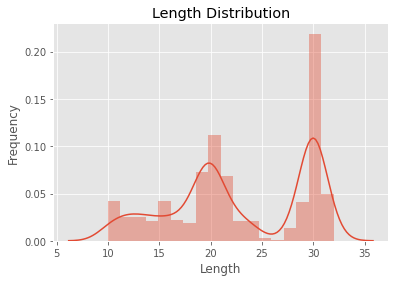

In [ ]:
plot_colum_distribution('Length Distribution','Length','Frequency',Dataset_AGD,'length')

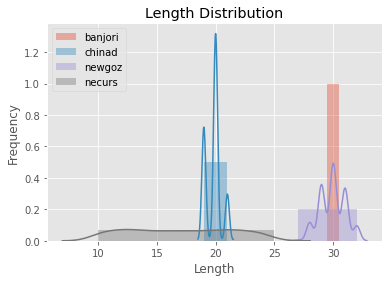

In [ ]:
plot_column_distribution('Length Distribution','Length','Frequency',AGD,'length',length_of_domain,1)

### Vowel ratio in domain
Vowel ratio is obtained by frequency calculation of vowel letter "a", "e", "i", "o", "u".


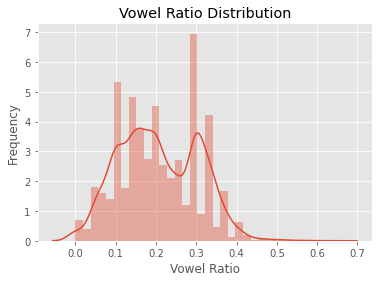

In [ ]:
plot_colum_distribution('Vowel Ratio Distribution','Vowel Ratio','Frequency',Dataset_AGD,'vowel ratio')

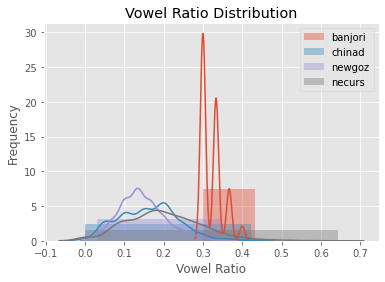

In [ ]:
plot_column_distribution('Vowel Ratio Distribution','Vowel Ratio','Frequency',AGD,'vowel ratio',ratio_of_vowel,1)

### Digit ratio in domain
Digit ratio is obtained by frequency calculation of number 0~9.


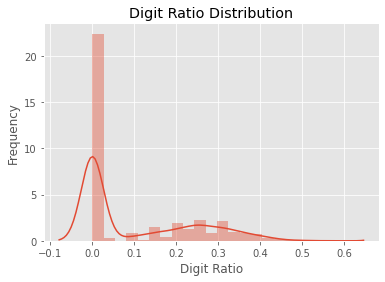

In [ ]:
plot_colum_distribution('Digit Ratio Distribution','Digit Ratio','Frequency',Dataset_AGD,'digit ratio')

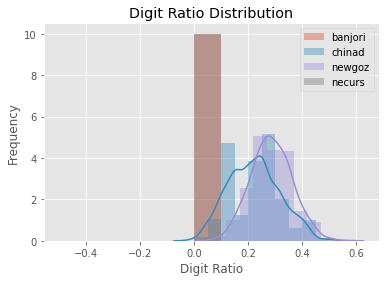

In [ ]:
plot_column_distribution('Digit Ratio Distribution','Digit Ratio','Frequency',AGD,'digit ratio',ratio_of_digit)

### Repeat letter ratio in domain
The repetition of more than three consecutive letters is not observed in English vocabulary as well as legitimate domain names. However, the DGA generated domains tend to contain alphabetic sequences with more repeated characters.

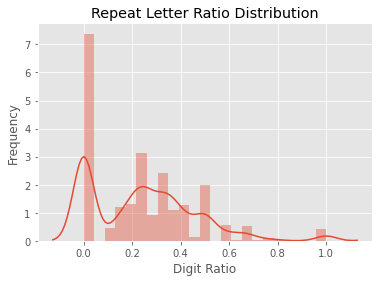

In [ ]:
plot_colum_distribution('Repeat Letter Ratio Distribution','Digit Ratio','Frequency',Dataset_AGD,'repeat character ratio')

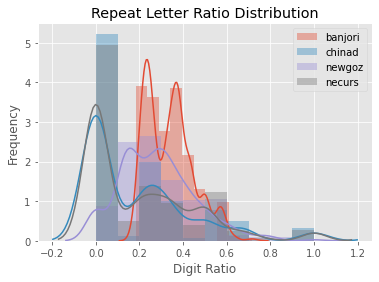

In [ ]:
plot_column_distribution('Repeat Letter Ratio Distribution','Digit Ratio','Frequency',AGD,'repeat character ratio',repeat_character_ratio)

### Consecutive digit ratio in domain

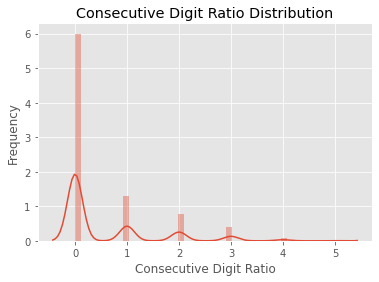

In [ ]:
plot_colum_distribution('Consecutive Digit Ratio Distribution','Consecutive Digit Ratio','Frequency',Dataset_AGD,'consecutive digit ratio')

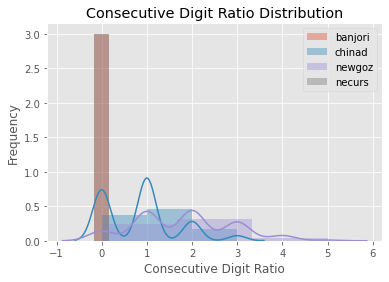

In [ ]:
plot_column_distribution('Consecutive Digit Ratio Distribution','Consecutive Digit Ratio','Frequency',AGD,'consecutive digit ratio',consecutive_digits,3)

### Consecutive consonant ratio in domain

In [ ]:
# def consecutive_consonant(domain):

# consecutive_consonant('google')

### N-gram score
For n = 2,3,4.

It indicates  the  **order  of  n-gram  in  a  domain  *on  n-gram dataset***.  If  **a  domain  is  generated  by  DGA  botnet,  n-gram  score  is smaller than normal**. We extract p n-gram of a domain d and base on order of n-gram in English dictionary & Whitelist to score.

$S(domain) = \frac{ \sum{count(t)}*{freq(t)} }{l}$ <br>

$count(t)$ is the value of n-gram in dictionary or whitelist. <br>
$freq(t)$ is the frequency of n-gram in the domain. <br>
$l$ is the n-gram number in domain 'd'.<br>

### N-gram  frequence  
It let  us  know  **the  ratio between  n-gram  are likely to occur more and likely to appear less**. Experiment on high ranking domain of Alexa and find  different clusters of n-gram. Decide a thresold and those above are common n-gram and those below are rare n-gram.


### Entropy
The intuition is that most DGAs produce random looking domain name strings, and we want to account for this characteristic of the DGAs.


Entropy  indicates  the  uncertainty  or  randomness  level  of  a  domain. The entropy of NXDomains generated by the algorithm will be higher than normal domains. The DGA generated domains are constructed based on different seeds used by different algorithms so they exhibit certain randomness in their structure which differentiates it from the legitimate domains. <br>

$E(domain) = - \sum{\frac{count(c)}{N}}*\log{\frac{count(c)}{N}}$ <br>

$c$ is a chracter. <br>
$count(c)$ is the frequency of character in domain. <br>
$N$ is the length of domain. <br>



> **Shanon Entropy**  -- The fundamental concept behind Shannon entropy is the so-called self-information of an event, sometimes called surprisal. The intuition behind self-information is as follows. When an unlikely outcome of an event (random variable) is observed, we associate it with a high amount of information. Contrarily, when a more likely outcome is observed, we associate it with a smaller amount of information. It is very helpful to think of self-information as the surprise associated with an event.


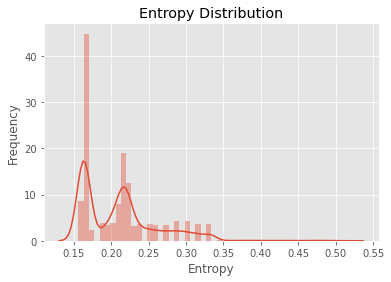

In [ ]:
plot_colum_distribution('Entropy Distribution','Entropy','Frequency',Dataset_AGD,'entropy')

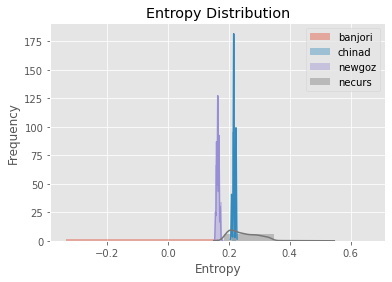

In [ ]:
plot_column_distribution('Entropy Distribution','Entropy','Frequency',AGD,'entropy',entropy,2)

### Relative Entropy (KL Divergence)
Relative entropy compares **two** distributions, so to perform the calculations some baseline data needs to be collected this requires additional work, it improves the fidelity of the randomness detection.

In [ ]:
# plot_colum_distribution('Relative Entropy Distribution','Relative Entropy','Frequency',Dataset_AGD,'relative entropy')

In [ ]:
# plot_column_distribution('Relative Entropy Distribution','Relative Entropy','Frequency',AGD,'relative entropy',relative_entropy,2)

### Meaningful Characters Ratio
Meaningful Characters Ratio indicates the meaning of a domain. The domain  that  is  generated  by  DGA  botnet  has  low  meaningful characters ratio. <br>

$R(domain) = \frac{\sum_{sub\ \subseteq \  domain}{w(sub)}}{l}$ <br>

$sub$ is a substring of domain. <br>
$w(sub)$ return 1 if the sub-string is meaningfull. <br>
$l$ is the length of domain. <br>


### Length of longest meaningful substring
The malicious domains are randomly constructed by DGA algorithm and are mostly meaningless long words. On the contrary, the benign web owners choose succinct domain names which are easy to remember.

## Dataset Description

In [ ]:
Dataset_AGD.describe()

,length,vowel ratio,digit ratio,repeat character ratio,consecutive digit ratio,entropy
count,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000,5048.000000
mean,22.709192,0.206170,0.100625,0.242034,0.527536,0.210540
std,6.610016,0.097519,0.136863,0.220738,0.937324,0.051714
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.156250
25%,19.000000,0.133333,0.000000,0.000000,0.000000,0.163563
50%,21.000000,0.200000,0.000000,0.250000,0.000000,0.209158
75%,30.000000,0.300000,0.233333,0.375000,1.000000,0.223575
max,32.000000,0.642857,0.566667,1.000000,5.000000,0.511219


## Standardize The Data

In [ ]:
# Coverting data frame to a numpy array
x = np.asarray(Dataset_AGD.iloc[:,2:].values)

In [ ]:
sc = StandardScaler()
Dataset_AGD_Scaled = sc.fit_transform(x[:,:])

# DGA Clustering
DGA  Clustering  is  a  stage  where  the  NXDomains  are  grouped  into clusters based on a similarity measure. Domains belonging to the same cluster  are  likely  created  by  the  same  domain  generation  algorithms with    high  probability. It exploits the fact that NXDomains generated by same DGA algorithm exhibits certain similarities in their linguistic characteristics, thus they tend to have a higher probability of similarities during a certain epoch.

## K- Means

## DBSCAN

It can discover clusters of arbitrary shape. Efficient for large database, i.e. sample size more than few thousands.
The main concept of DBSCAN algorithm is to locate regions of high density that are separated from one another by regions of low density.

- **Density at a point P**: Number of points within a circle of Radius *Eps (ϵ)* from point P*.*
- **Dense Region**: For each point in the cluster, the circle with radius ϵ contains at least minimum number of points (*MinPts*).

The Epsilon neighborhood of a point P in the database D is defined as

$$N(p) = \{ q \in D | dist(p,q) \leq \epsilon \}$$

Following the definition of dense region, **a point can be classified as a Core Point if $|N (p)|≥ MinPts$.**

- The Core Points, lie usually within the interior of a cluster.
- A Border Point has fewer than MinPts within its ϵ-neighborhood (N), but it lies in the neighborhood of another core point.
- Noise is any data point that is neither core nor border point.

### Drawbacks

- If the database has data points that form clusters of varying density, then DBSCAN fails to cluster the data points well, since the clustering depends on ϵ and MinPts parameter, they cannot be chosen separately for all clusters.
- Setting up ϵ and MinPts could be tricky and, may need comparisons for several iterations with different values of ϵ and MinPts.

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X) # Enter the database here.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))


# Classification
We want to know what class (a.k.a. group) an observation belongs to.

## Balancing
When the majority of data items in your dataset represents items belonging to one class, we say the dataset is skewed or imbalanced.
### Why does it matter if the dataset is skewed?
When your dataset do not represent all classes of data equally, the model might overfit to the class that’s represented more in your dataset and become oblivious to the existence of the minority class. It might even give you a good accuracy but fail miserably in real life.

### Resampling
It is done after the data is split into training, test and validation sets. Resampling is done only on the training set or the performance measures could get skewed. Resampling can be of two types: Over-sampling and Under-sampling.

#### Over sampling
It involves removing samples from the majority class and over-sampling involves adding more examples from the minority class . The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.

#### Under-sampling
In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.



## Data Splitting

## Classifiers


### Random Forest

Decision Trees


# Plots

## AGD's Top Level Domain distribution
We plot to see how are AGD distributed among the various top-level domains

In [ ]:
from collections import Counter as counter
tld = []
for x in AGD:
  for index, domain in AGD[x].iterrows():
    tld.append(domain.values.tolist()[0].split('.')[-1])

tld_distribution = counter(tld)

In [ ]:
x_tld = []
y_tld = []

for x in tld_distribution:
  x_tld.append(x)
  y_tld.append(tld_distribution[x])

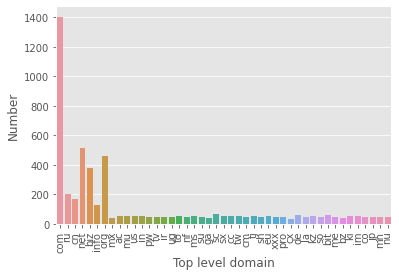

In [ ]:
ax = sns.barplot(x_tld,y_tld)
ax.set(xlabel='Top level domain', ylabel='Number')
ax.set_xticklabels(x_tld, rotation=90)
plt.show()

## Benign Top Level Domain distribution
We plot to see how are legitimate domains distributed among the various top-level domains

## Correlation Matrix

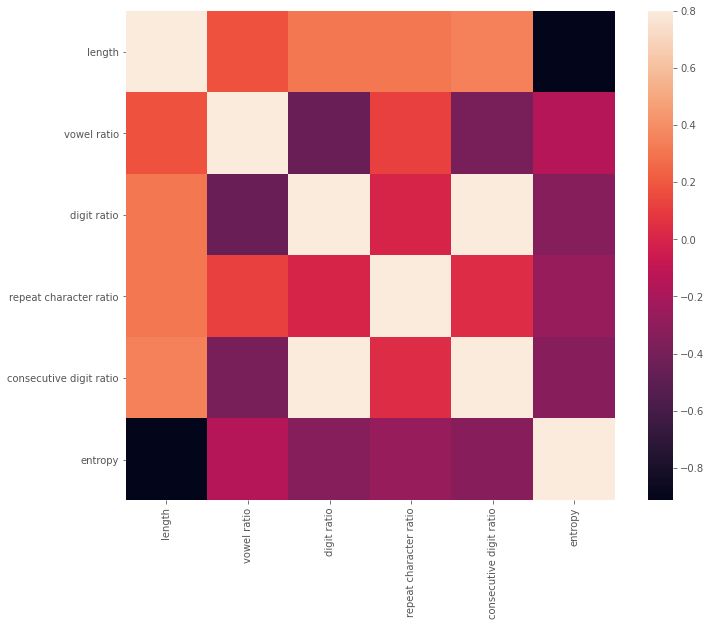

In [ ]:
correlation_matrix = Dataset_AGD.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix,vmax=0.8,square = True)
plt.show()

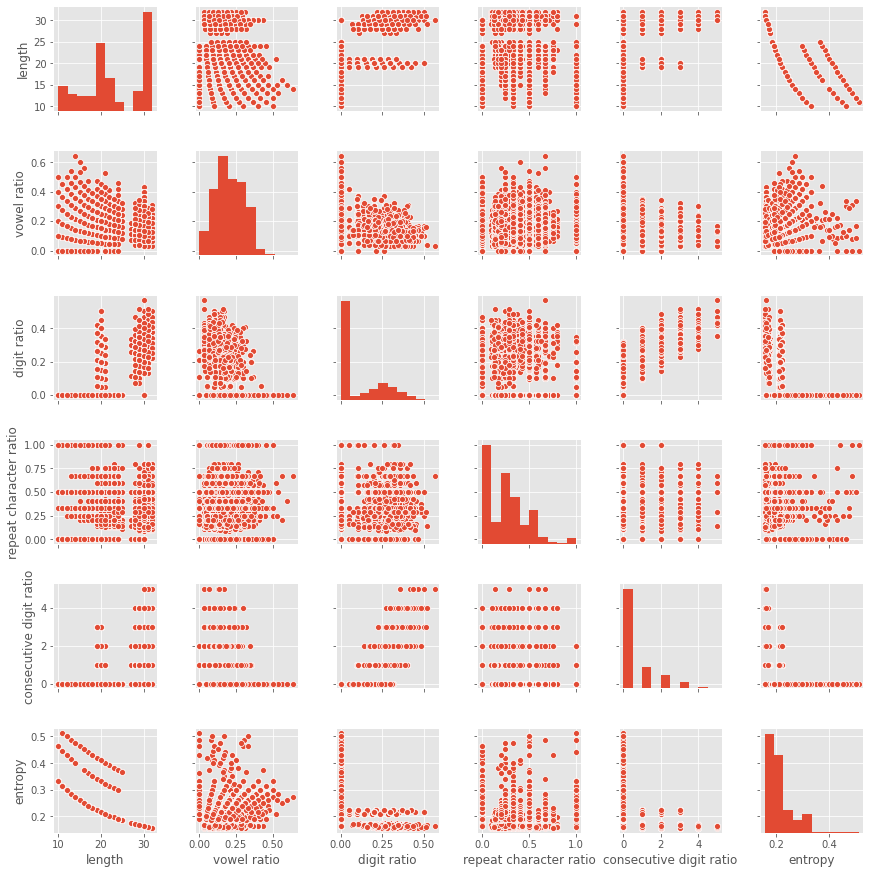

In [ ]:
sns.pairplot(Dataset_AGD, size=2.0)

# Setup

In [ ]:
# !git clone https://github.com/baderj/domain_generation_algorithms.git # banjori, corebot
# !git clone https://github.com/360netlab/DGA.git # chinad
# #!git clone https://github.com/dwyl/english-words.git
# !git clone https://github.com/first20hours/google-10000-english.git
# # !pip install googletrans # -- lib for language detection
# # !pip install langdetect


In [ ]:
# _ = []
# for line in open(join("/content/google-10000-english",'google-10000-english-no-swears.txt')):
#   word = line.strip('\n')
#   if len(word) > 4 and bool(re.match(r'[a-zA-Z]{4,}', word)):
#     _.append(word)
# dataframe = pd.DataFrame(_,columns=["word"])
# dataframe.to_csv('words.csv',index=False)

In [ ]:
# Dataset_dictionary_word = pd.read_csv('words.csv')

In [ ]:
# def n_gram_dictionary(dataset,n):
#   _ = {}
#   for index, x in dataset.iterrows():
#     strng = x[0]
#     for i in range(len(strng) - n):
#       _[strng[i:i+n]] = _.get(strng[i:i+n],0)+1
#   return _

In [ ]:
# bi_gram_dict = {}
# for index,x in Dataset_dictionary_word.iterrows():
#   strng = x[0]
#   for i in range(len(strng) - 2 ):
#     bi_gram_dict[strng[i:i+2]] = bi_gram_dict.get(strng[i:i+2],0) + 1

In [ ]:
# tri_gram_dict = {}
# for index,x in Dataset_dictionary_word.iterrows():
#   strng = x[0]
#   for i in range(len(strng) - 3 ):
#     tri_gram_dict[strng[i:i+3]] = tri_gram_dict.get(strng[i:i+3],0) + 1

In [ ]:
# quad_gram_dict = {}
# for index,x in Dataset_dictionary_word.iterrows():
#   strng = x[0]
#   for i in range(len(strng) - 4 ):
#     quad_gram_dict[strng[i:i+4]] = quad_gram_dict.get(strng[i:i+4],0) + 1

In [ ]:
# quad_gram_dict

In [ ]:
Dataset_AGD

,domain,label,length,vowel ratio,digit ratio,repeat character ratio,consecutive digit ratio,entropy
0,earnestnessbiophysicalohax.com,banjori,30,0.366667,0.0,0.500000,0,0.163563
1,kwtoestnessbiophysicalohax.com,banjori,30,0.333333,0.0,0.250000,0,0.163563
2,rvcxestnessbiophysicalohax.com,banjori,30,0.300000,0.0,0.375000,0,0.163563
3,hjbtestnessbiophysicalohax.com,banjori,30,0.300000,0.0,0.333333,0,0.163563
4,txmoestnessbiophysicalohax.com,banjori,30,0.333333,0.0,0.200000,0,0.163563
...,...,...,...,...,...,...,...,...
2043,cqhioigxhdudk.bz,necurs,16,0.250000,0.0,0.000000,0,0.250000
2044,pbihekfalmyvee.sc,necurs,17,0.294118,0.0,1.000000,0,0.240439
2045,tbyucbxxeuboqmeasxgv.pro,necurs,24,0.291667,0.0,0.400000,0,0.191040
2046,sjphksfiwtufqxyibwcov.mu,necurs,24,0.208333,0.0,0.000000,0,0.191040


# Temporary

In [ ]:
### Length of domain

# apply_function_to_each_row(length_of_domain,Dataset_AGD,'domain','length')

# def length_of_domain(domain):
#   return len(domain)



# # plot distribution of values
# plt.title('Length to occurence')
# sns.distplot([Dataset_AGD['length'].values])
# plt.xlabel('Length')
# plt.ylabel('Frequency')
# plt.show()



# # plotting all DGA's distribution in single plot
# plt.title('Length to occurence')
# for x in AGD:
#   ax = plt.subplot()
#   apply_function_to_each_row(length_of_domain,AGD[x],'domain','length')
#   df = AGD[x]
#   sns.distplot(df['length'][df.label == x],label=f'{x}',bins=1)
#   ax.set_xlabel('')
# plt.legend()
# plt.xlabel('Length')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
## Vowel Ratio

# def vowel_count(domain):
#   return len(re.findall(r'[aeiou]',domain))

# def ratio_of_vowel(domain):
#   return vowel_count(domain)/len(domain)

# calculate the feature for all AGD dataset
# apply_function_to_each_row(ratio_of_vowel,Dataset_AGD,'domain','vowel ratio')

# # plot distribution of values
# plt.title('Length to occurence')
# sns.distplot([Dataset_AGD['vowel ratio'].values])
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

# # plotting all DGA's distribution in single plot
# plt.title('Length to occurence')
# for x in AGD:
#   ax = plt.subplot()
#   apply_function_to_each_row(ratio_of_vowel,AGD[x],'domain','vowel ratio')
#   df = AGD[x]
#   sns.distplot(df['vowel ratio'][df.label == x],label=f'{x}')
#   ax.set_xlabel('')
# plt.legend()
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# def int_count(domain):
#   _ = [c for c in list(domain) if c.isdigit()]
#   return len(_)

# def ratio_of_digit(domain):
#   return int_count(domain)/len(domain)

# calculate the feature for all dataset
# apply_function_to_each_row(ratio_of_digit,Dataset_AGD,'domain','digit ratio')

## plot distribution of values
# plt.title('Length to occurence')
# sns.distplot([Dataset_AGD['digit ratio'].values])
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

# # plotting all DGA's distribution in single plot
# plt.title('Length to occurence')
# for x in AGD:
#   ax = plt.subplot()
#   apply_function_to_each_row(ratio_of_digit,AGD[x],'domain','digit ratio')
#   df = AGD[x]
#   sns.distplot(df['digit ratio'][df.label == x],label=f'{x}')
#   ax.set_xlabel('')
# plt.legend()
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
### Plot length of various AGD's

# # DGA_ = {}
# # for x in AGD:
# #   DGA_[x] = {}
# #   for index,domain in AGD[x].iterrows():
# #     domain = domain.values.tolist()[0]
# #     second_level_domain, top_level_domain = split_domain(domain)
# #     if second_level_domain != '#' and top_level_domain != '#':
# #       DGA_[x][length_of_domain(second_level_domain)] = DGA_[x].get(length_of_domain(second_level_domain),0)+1

# plt.title('Lenghth to occurence')

# for _ in DGA_:
#   x = list(DGA_[_])
#   y = list(DGA_[_].values())
#   plt.plot(x,y, label=f'{_}')

# # plt.plot(neighbours, train_accuracy, label='Training accuracy')
# plt.legend()
# plt.xlabel('Lenght')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# def repeated_character(domain):
#   char_repeated_3 = 0
#   char_repeated_2 = 0
#   character_frequency = Counter(list(domain))
#   for c in character_frequency:
#     if character_frequency[c] != 1:
#       if character_frequency[c] >= 3:
#         char_repeated_3+=1
#       char_repeated_2+=1
#   return (char_repeated_3,char_repeated_2) # return --> Total characters which has character:count > 3 & character:count > 2

# def repeat_character_ratio(domain):
#   char_repeated_3,char_repeated_2 = repeated_character(domain)
#   try:
#     return char_repeated_3/char_repeated_2
#   except:
#     return 0

# # calculate the feature for all dataset
# apply_function_to_each_row(repeat_character_ratio,Dataset_AGD,'domain','repeat character ratio')

# # plot distribution of values
# plt.title('Length to occurence')
# sns.distplot([Dataset_AGD['repeat character ratio'].values])
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

# # plotting all DGA's distribution in single plot
# plt.title('Length to occurence')
# for x in AGD:
#   ax = plt.subplot()
#   apply_function_to_each_row(repeat_character_ratio,AGD[x],'domain','repeat character ratio')
#   df = AGD[x]
#   sns.distplot(df['repeat character ratio'][df.label == x],label=f'{x}')
#   ax.set_xlabel('')
# plt.legend()
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# def consecutive_digits(domain):
#   return len(re.findall(r'[0-9][0-9]+',domain))

# # calculate the feature for all dataset
# apply_function_to_each_row(consecutive_digits,Dataset_AGD,'domain','consecutive digit')

# # plot distribution of values
# plt.title('Length to occurence')
# sns.distplot([Dataset_AGD['consecutive digit'].values])
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

# # plotting all DGA's distribution in single plot
# plt.title('Length to occurence')
# for x in AGD:
#   ax = plt.subplot()
#   apply_function_to_each_row(consecutive_digits,AGD[x],'domain','consecutive digit')
#   df = AGD[x]
#   sns.distplot(df['consecutive digit'][df.label == x],label=f'{x}',bins=3)
#   ax.set_xlabel('')
# plt.legend()
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# def entropy(domain):
#   c = Counter(list(domain))
#   sum = 0
#   for x in c:
#     temp = c[x]/len(domain)
#     sum = -1*(temp)*(log2(temp))
#   return sum

# apply_function_to_each_row(entropy,Dataset_AGD,'domain','entropy')

# # plot distribution of values
# plt.title('Length to occurence')
# sns.distplot([Dataset_AGD['entropy'].values])
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

# # plotting all DGA's distribution in single plot
# plt.title('Length to occurence')
# for x in AGD:
#   ax = plt.subplot()
#   apply_function_to_each_row(entropy,AGD[x],'domain','entropy')
#   df = AGD[x]
#   sns.distplot(df['entropy'][df.label == x],label=f'{x}',bins=1)
#   ax.set_xlabel('')
# plt.legend()
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
# character_freq, total_character = character_count(Dataset_dictionary_word)

# for x in character_freq:
  # character_freq[x] = character_freq[x]/total_character

# apply_function_to_each_row(relative_entropy,Dataset_AGD,'domain','relative entropy')

# # plot distribution of values
# plt.title('Length to occurence')
# sns.distplot([Dataset_AGD['relative entropy'].values])
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

# # plotting all DGA's distribution in single plot
# plt.title('Length to occurence')
# for x in AGD:
#   ax = plt.subplot()
#   apply_function_to_each_row(relative_entropy,AGD[x],'domain','relative entropy')
#   df = AGD[x]
#   sns.distplot(df['relative entropy'][df.label == x],label=f'{x}',bins=1)
#   ax.set_xlabel('')
# plt.legend()
# plt.xlabel('Ratio')
# plt.ylabel('Frequency')
# plt.show()

In [ ]:
gram_dict = {'2':{},'3':{},'4':{}}
def n_gram(domain):
  domain_len = len(domain)
  for i in range(domain_len):
    for j in range(2,5):
      if i+j <= domain_len:
        strng = domain[i:i+j]
        print(i,j,strng)
        gram_dict[str(j)][strng] = gram_dict[str(j)].get(strng,0) + 1


In [ ]:
n_gram('google')

0 2 go
0 3 goo
0 4 goog
1 2 oo
1 3 oog
1 4 oogl
2 2 og
2 3 ogl
2 4 ogle
3 2 gl
3 3 gle
4 2 le


In [ ]:
def n_gram_score(domain):
  domain_len = len(domain)
  score = {'4':0,'2':0,'3':0}
  for i in range(domain_len):
    for j in range(2,5):
      if i+j <= domain_len:
        strng = domain[i:i+j]
        score[str(j)] += gram_dict[str(j)][strng]
        print(score[str(j)], strng,gram_dict[str(j)][strng])
  for k in score:
    print(score[k])
    score[k] = score[k]/len(domain)
  return score

In [ ]:
n_gram_score('google')

1 go 1
1 goo 1
1 goog 1
2 oo 1
2 oog 1
2 oogl 1
3 og 1
3 ogl 1
3 ogle 1
4 gl 1
4 gle 1
5 le 1
3
5
4


{'2': 0.8333333333333334, '3': 0.6666666666666666, '4': 0.5}

In [ ]:
5/len('google')

0.8333333333333334

In [ ]:
import enchant
d = enchant.Dict("en_US")

def substring(word):
  _ = []
  for i in range(len(word)):
    for j in range(i+1,len(word)+1):
      if len(word[i:j]) > 2 and d.check(word[i:j]):
        _.append(word[i:j])
  return _

In [ ]:
def meaningfull_character_ratio(domain):
  return len(substring(domain))/len(domain)

In [ ]:
meaningfull_character_ratio('facebook')

0.5

In [ ]:
def lenght_of_longest_meaningfull_domain(domain):
  return max(map(len,substring(domain)))/len(domain)

In [ ]:
lenght_of_longest_meaningfull_domain('facebook')

0.5

In [ ]:
# import enchant
# broker = enchant.Broker()
# broker.describe()
# broker.list_languages()


['en_US', 'en', 'en_AU', 'en_CA', 'en_GB']

In [ ]:

d.check("Hello")

True

In [ ]:
# !apt install enchant

In [ ]:
# def n_gram(word,dct,n):
#   for i in range(len(word) - n):
#     dct[word[i:i+n]] = dct.get(word[i:i+n],0)+1

# # Function returns a dictionary of frequency of n-gram
# def n_gram_dictionary(dataset,n):
#   _ = {}
#   for index, x in dataset.iterrows():
#     strng = x[0]
#     for i in range(len(strng) - n):
#       _[strng[i:i+n]] = _.get(strng[i:i+n],0)+1
#   return _

# def n_gram_score(dict,domain,n):
#   word_dict = {}
#   sum = 0
#   n_gram(domain,word_dct,n)
#   for x in word_dict:
#     sum += word_dict[x]*dict.get(x,0)
#   return sum/len(word_dict)

In [ ]:
# !pip install import-ipynb
import import_ipynb
